## <center>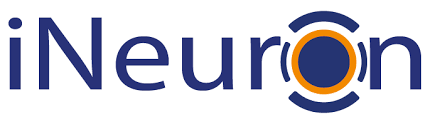</center>
### <center>Mushroom Classification</center>
#### <center>Domain - Agriculture</center>
#### <center>Author - Akshay Paunikar</center>
##### Problem Statement :
The Audubon Society Field Guide to North American Mushrooms contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom (1981). Each species is labelled as either definitely edible, definitely poisonous, or maybe edible but not recommended. This last category was merged with the toxic category. The Guide asserts unequivocally that there is no simple rule for judging a mushroom's edibility, such as "leaflets three, leave it be" for Poisonous Oak and Ivy. The main goal is to predict which mushroom is poisonous & which is edible.

In [96]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
# set the working directory
import io
%cd "dataset/"

[WinError 2] The system cannot find the file specified: 'dataset/'
e:\iNeuron\Internship\Mushroom Classification\mushroom\notebook\dataset


In [98]:
# import the data
mushroom = pd.read_csv("mushrooms.csv")

# check the first five records
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Attribute Information:

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [99]:
mushroom = mushroom.replace({
    "class":{'e':'edible','p':'poisonous'},
    "cap-shape":{'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'},
    "cap-surface":{'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    "cap-color":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    "bruises":{'t':'yes','f':'no'},
    "odor":{'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    "gill-attachment":{'a':'attached','d':'descending','f':'free','n':'notched'},
    "gill-spacing":{'c':'close','w':'crowded','d':'distant'},
    "gill-size":{'b':'broad','n':'narrow'},
    "gill-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red',
                  'w':'white','y':'yellow'},
    "stalk-shape":{'e':'enlarging','t':'tapering'},
    "stalk-root":{'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted'},
    "stalk-surface-above-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-surface-below-ring":{'f':'fibrous','y':'scaly','k':'silky','s':'smooth'},
    "stalk-color-above-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "stalk-color-below-ring":{'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'},
    "veil-type":{'p':'partial','u':'universal'},
    "veil-color":{'n':'brown','o':'orange','w':'white','y':'yellow'},
    "ring-number":{'n':'none','o':'one','t':'two'},
    "ring-type":{'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'},
    "spore-print-color":{'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'},
    "population":{'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'},
    "habitat":{'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}  
})

In [100]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [101]:
# dimension of the data
mushroom.shape

(8124, 23)

In [102]:
# datatypes present
mushroom.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [103]:
# descriptive statistics
mushroom.describe(include="all").transpose()

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


In [104]:
# concise summary
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [105]:
# check for duplicate records
mushroom.duplicated().sum()

0

In [106]:
# Check for the null / missing values in our data
mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

As we can see that there no missing/null values in the dataset. However, if you go through the data description you will find that the missing values in one column is replaced with "?". We need to handle this missing values.

In [107]:
for i in mushroom.columns:
    missing = mushroom[i][mushroom[i]=='?'].count()
    if missing != 0:
        print(i, missing)

stalk-root 2480


There are 2480 missing values in 'stalk-root' column. First we will replace this values with np.nan so that we can handle missing data.

In [108]:
mushroom['stalk-root'] = mushroom['stalk-root'].replace(to_replace='?',value=np.nan)

In [109]:
# Lets check for missing values again
mushroom.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

Now we will impute the missing values in 'stalk-root' column using sklearn SimpleImputer

In [110]:
# import simple imputer
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [111]:
mushroom['stalk-root'] = impute.fit_transform(mushroom[['stalk-root']])

In [112]:
# Lets check how many unique values are present in each columns
for i in mushroom.columns:
    print(i,":",mushroom[i].nunique(),"\n",mushroom[i].unique(),"\n")

class : 2 
 ['poisonous' 'edible'] 

cap-shape : 6 
 ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical'] 

cap-surface : 4 
 ['smooth' 'scaly' 'fibrous' 'grooves'] 

cap-color : 10 
 ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green'] 

bruises : 2 
 ['yes' 'no'] 

odor : 9 
 ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty'] 

gill-attachment : 2 
 ['free' 'attached'] 

gill-spacing : 2 
 ['close' 'crowded'] 

gill-size : 2 
 ['narrow' 'broad'] 

gill-color : 12 
 ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange'] 

stalk-shape : 2 
 ['enlarging' 'tapering'] 

stalk-root : 4 
 ['equal' 'club' 'bulbous' 'rooted'] 

stalk-surface-above-ring : 4 
 ['smooth' 'fibrous' 'silky' 'scaly'] 

stalk-surface-below-ring : 4 
 ['smooth' 'fibrous' 'scaly' 'silky'] 

stalk-color-above-ring : 9 
 ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow'] 

stalk-color-below-rin

From above data we can see that 'veil-type' has only one value throughout the data. So it won't give us much information regarding the class of the mushroom. So we will drop this column.

In [113]:
mushroom = mushroom.drop(['veil-type'],axis=1)

In [114]:
# save this data to csv file for later use
mushroom.to_csv("mushroom_data.csv")

### Exploratory Data Analysis
#### Univariate Analysis

In [115]:
for i in mushroom.columns:
    print(i,":\n",mushroom[i].value_counts(),"\n")

class :
 edible       4208
poisonous    3916
Name: class, dtype: int64 

cap-shape :
 convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64 

cap-surface :
 scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64 

cap-color :
 brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64 

bruises :
 no     4748
yes    3376
Name: bruises, dtype: int64 

odor :
 none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64 

gill-attachment :
 free        7914
attached     210
Name: gill-attachment, dtype: int64 

gill-spacing :
 close      6812
crowded    1312
Name: gill-spacing, dtype: int64 

gill-size :
 broad     5612
nar

let's plot above data using seaborn and matplotlib

##### class, cap-shape, cap-surface, cap-color

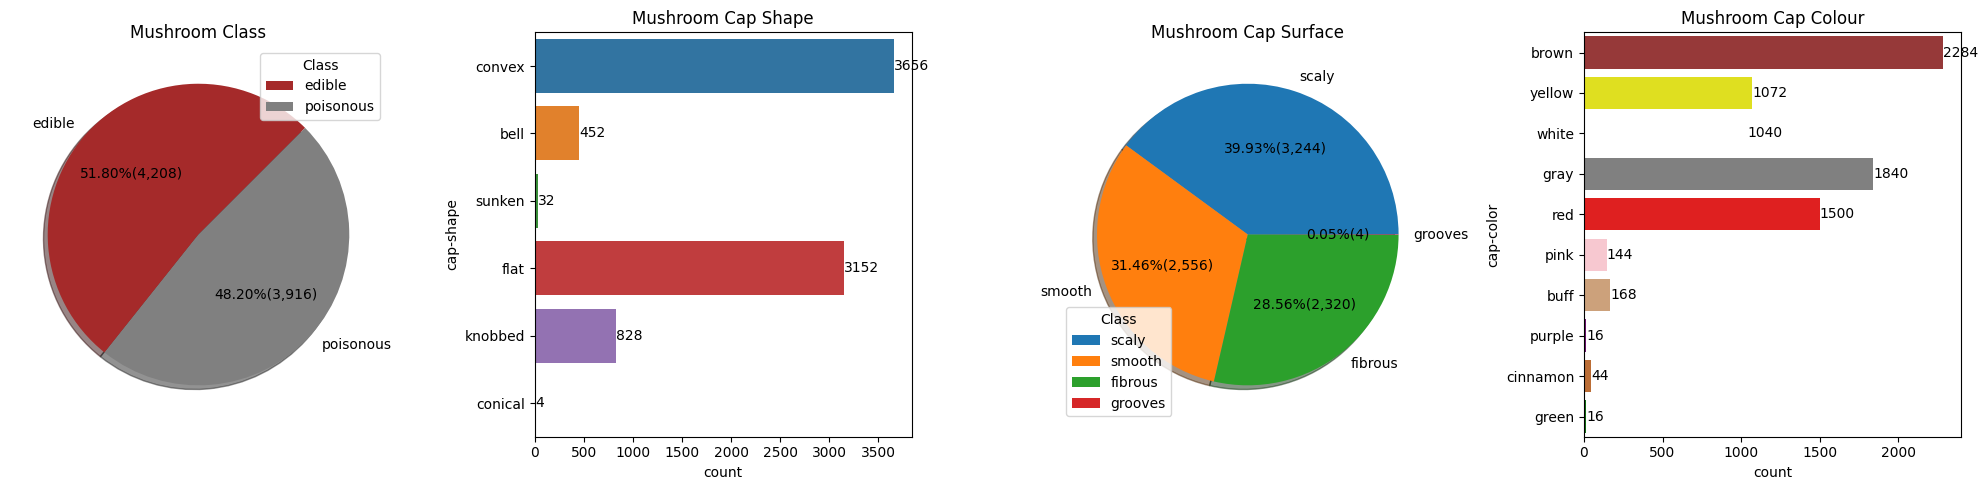

In [116]:
plt.figure(figsize=(20,5))

# class

ax1 = plt.subplot2grid((1,4),(0,0))

dataClass = mushroom['class'].value_counts().values
labelClass = mushroom['class'].value_counts().index

plt.pie(x=dataClass, labels=labelClass,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataClass)/100), colors=['brown','gray'], shadow=True, startangle=45)
plt.legend(labelClass, loc='upper right', title='Class')
plt.title("Mushroom Class")

# cap-shape

ax2 = plt.subplot2grid((1,4),(0,1))

sns.countplot(y="cap-shape", data=mushroom, ax=ax2)
for i in ax2.containers:
        ax2.bar_label(i)
plt.title("Mushroom Cap Shape")

# cap-surface

ax3 = plt.subplot2grid((1,4),(0,2))

dataCapSurface = mushroom['cap-surface'].value_counts().values
labelCapSurface = mushroom['cap-surface'].value_counts().index

plt.pie(x=dataCapSurface, labels=labelCapSurface,
        autopct=lambda p : '{:.2f}%({:,.0f})'.format(p,p * sum(dataCapSurface)/100), shadow=True)
plt.legend(labelCapSurface, loc='lower left', title='Class')
plt.title("Mushroom Cap Surface")

# cap-color

ax4 = plt.subplot2grid((1,4),(0,3))

sns.countplot(y='cap-color', data=mushroom, ax=ax4, palette=['#A52A2A','#FFFF00','#FFFFFF','#808080','#FF0000','#FFC0CB','#DAA06D',
                                                             '#800080','#D2691E','#008000'])
for i in ax4.containers:
        ax4.bar_label(i)
plt.title("Mushroom Cap Colour")

plt.tight_layout()
plt.show()